In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
import datetime as dt

In [12]:
df = pd.read_csv('fire_archive.csv')

In [13]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36011 entries, 0 to 36010
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    36011 non-null  float64
 1   longitude   36011 non-null  float64
 2   brightness  36011 non-null  float64
 3   scan        36011 non-null  float64
 4   track       36011 non-null  float64
 5   acq_date    36011 non-null  object 
 6   acq_time    36011 non-null  int64  
 7   satellite   36011 non-null  object 
 8   instrument  36011 non-null  object 
 9   confidence  36011 non-null  int64  
 10  version     36011 non-null  float64
 11  bright_t31  36011 non-null  float64
 12  frp         36011 non-null  float64
 13  daynight    36011 non-null  object 
 14  type        36011 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 4.1+ MB


In [15]:
df.shape

(36011, 15)

In [16]:
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

<AxesSubplot:>

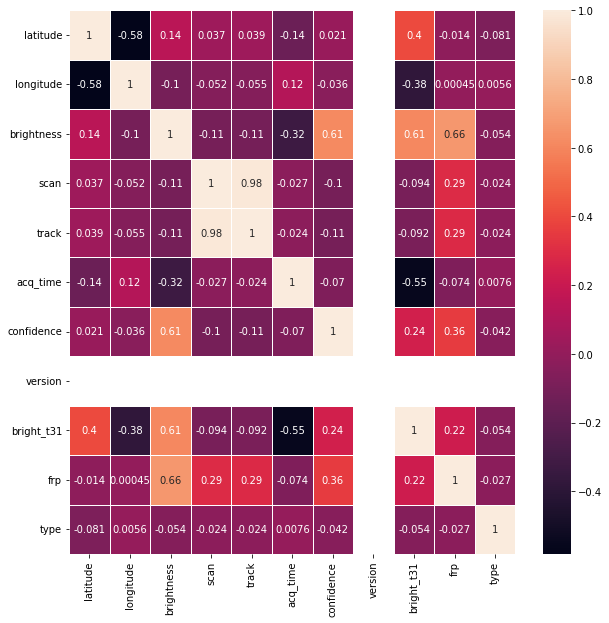

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,linewidths=.5)

In [17]:
df=df.drop(["track"], axis= 1)

In [18]:
df.head(1)

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.807,142.0583,313.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0


In [19]:
df.nunique()

latitude      30310
longitude     31127
brightness     1182
scan             39
acq_date         61
acq_time        662
satellite         2
instrument        1
confidence      101
version           1
bright_t31      590
frp            2976
daynight          2
type              3
dtype: int64

In [20]:
df = df.drop(['instrument', 'version'], axis = 1)

In [21]:
df.head(1)

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.807,142.0583,313.0,1.0,2019-08-01,56,Terra,48,297.3,6.6,D,0


In [23]:
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}
df['daynight'] = df['daynight'].map(daynight_map)
df['satellite'] = df['satellite'].map(satellite_map)

In [24]:
df['type'].value_counts()

0    35666
2      335
3       10
Name: type, dtype: int64

In [26]:
types = pd.get_dummies(df['type'])
df = pd.concat([df, types], axis=1)
df = df.drop(['type'], axis = 1)

In [27]:
df.head(2)

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,0,2,3
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,1,0,0


In [28]:
df = df.rename(columns={0: 'type_0', 2: 'type_2', 3: 'type_3'})

In [29]:
bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
df['scan_binned'] = pd.cut(df['scan'], bins=bins, labels=labels)

In [36]:
df['acq_date'] = pd.to_datetime(df['acq_date'])

In [37]:
df = df.drop(['scan'], axis = 1)

In [39]:
df['year'] = df['acq_date'].dt.year
df['month'] = df['acq_date'].dt.month
df['day'] = df['acq_date'].dt.day

In [40]:
df.head(2)

,latitude,longitude,brightness,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_binned,year,month,day
0,-11.8070,142.0583,313.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0,1,2019,8,1
1,-11.7924,142.0850,319.3,2019-08-01,56,1,71,297.3,11.3,1,1,0,0,1,2019,8,1


In [41]:
y = df['confidence']
X = df.drop(['confidence', 'acq_date', 'acq_time', 'bright_t31', 'type_0'], axis = 1)

In [42]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X.iloc[:, :500], y, test_size=0.2)

In [43]:
random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)

In [44]:
random_model.fit(Xtrain, ytrain)
y_pred = random_model.predict(Xtest)
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

95.27 %
